## Long short-term memory(LSTM) Implementation - Multivariate


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
import re

C:\Users\u61152\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Build a function to get the data from the IMF website and save it locally

URL = 'https://www.imf.org/~/media/Files/Publications/WEO/WEO-Database/2020/02/WEOOct2020all.xls'
def get_data_from_IMF(URL):
    urllib.request.urlretrieve(URL, '.')

In [4]:
#we can use above function to download the data but we have done already so reading directly

In [5]:
# Reading the dataset
imf = pd.read_excel("data/WEOApr2020all_clean.xls", na_values=['--'])

In [6]:
imf.shape

(7246, 11)

In [7]:
# Let's take a look at the first few rows
imf.head(10)

,Unnamed: 0,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
0,0,Afghanistan,2002,33.908,0.000,0.000,18.835,0.000,0.000,0.0,-0.098
1,1,Afghanistan,2003,29.616,4.398,8.692,20.852,35.663,6.530,0.0,-2.102
2,2,Afghanistan,2004,37.216,-3.112,0.671,21.557,16.358,13.266,0.0,-2.393
3,3,Afghanistan,2005,30.226,8.042,11.830,24.858,10.569,10.562,0.0,-0.965
4,4,Afghanistan,2006,20.844,2.194,5.361,26.983,6.785,4.285,0.0,0.643
5,5,Afghanistan,2007,63.390,9.143,13.340,31.404,8.681,16.092,0.0,-2.492
6,6,Afghanistan,2008,33.769,1.286,3.863,33.252,26.419,18.814,0.0,-3.882
7,7,Afghanistan,2009,41.587,17.527,20.585,40.403,-6.811,-9.836,0.0,-1.779
8,8,Afghanistan,2010,29.430,5.431,8.438,44.323,2.179,10.246,0.0,0.922
9,9,Afghanistan,2011,26.574,3.234,6.479,48.180,11.804,9.312,0.0,-0.672


In [8]:
def get_data_frame(country):
    imf_country = imf[imf['Country']==country]
    return imf_country

In [9]:
IMF_UK = get_data_frame('United Kingdom')

In [10]:
IMF_UK

,Unnamed: 0,Country,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
6859,6859,United Kingdom,1980,0.537,-2.188,-2.031,501.788,16.849,15.157,7.133,-2.840
6860,6860,United Kingdom,1981,1.527,-0.837,-0.788,544.935,12.189,12.017,9.650,-3.777
6861,6861,United Kingdom,1982,0.555,2.116,1.995,590.148,8.511,5.364,10.725,-2.275
6862,6862,United Kingdom,1983,0.215,4.176,4.222,639.151,5.198,5.333,11.475,-2.875
6863,6863,United Kingdom,1984,-0.496,2.100,2.269,677.241,4.448,4.603,11.750,-3.164
6864,6864,United Kingdom,1985,-0.288,3.880,4.147,727.637,5.160,5.611,11.375,-2.479
6865,6865,United Kingdom,1986,-0.962,2.914,3.150,765.670,3.626,3.750,11.325,-2.277
6866,6866,United Kingdom,1987,-1.575,5.170,5.393,826.920,4.066,3.715,10.425,-1.605
6867,6867,United Kingdom,1988,-3.528,5.524,5.732,905.155,4.612,7.688,8.575,0.327
6868,6868,United Kingdom,1989,-4.061,2.288,2.578,964.891,5.216,5.496,7.225,0.589


#### Once we have data corresponding each country we dont need now country column also

In [11]:
IMF_UK.drop(['Country'] , axis=1, inplace=True)

In [12]:
IMF_UK.head()

,Unnamed: 0,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
6859,6859,1980,0.537,-2.188,-2.031,501.788,16.849,15.157,7.133,-2.840
6860,6860,1981,1.527,-0.837,-0.788,544.935,12.189,12.017,9.650,-3.777
6861,6861,1982,0.555,2.116,1.995,590.148,8.511,5.364,10.725,-2.275
6862,6862,1983,0.215,4.176,4.222,639.151,5.198,5.333,11.475,-2.875
6863,6863,1984,-0.496,2.100,2.269,677.241,4.448,4.603,11.750,-3.164


In [13]:
##### Now this data is ready to LSTM

In [14]:
IMF_UK.reset_index(drop=True)

,Unnamed: 0,Year,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
0,6859,1980,0.537,-2.188,-2.031,501.788,16.849,15.157,7.133,-2.840
1,6860,1981,1.527,-0.837,-0.788,544.935,12.189,12.017,9.650,-3.777
2,6861,1982,0.555,2.116,1.995,590.148,8.511,5.364,10.725,-2.275
3,6862,1983,0.215,4.176,4.222,639.151,5.198,5.333,11.475,-2.875
4,6863,1984,-0.496,2.100,2.269,677.241,4.448,4.603,11.750,-3.164
5,6864,1985,-0.288,3.880,4.147,727.637,5.160,5.611,11.375,-2.479
6,6865,1986,-0.962,2.914,3.150,765.670,3.626,3.750,11.325,-2.277
7,6866,1987,-1.575,5.170,5.393,826.920,4.066,3.715,10.425,-1.605
8,6867,1988,-3.528,5.524,5.732,905.155,4.612,7.688,8.575,0.327
9,6868,1989,-4.061,2.288,2.578,964.891,5.216,5.496,7.225,0.589


In [15]:
IMF_UK.drop(['Year'] , axis=1, inplace=True)

In [16]:
IMF_UK

,Unnamed: 0,Current_account_balance(GDP%),GDP_PER_CAP_cons_price(%),GDP_cons_price(%),GDP_current_prices(USD_Billion),Inflation_avg_consumer_prices(%),Inflation_eop_consumer prices(%),Unemployment_rate(%),lending/borrowing(GDP%)
6859,6859,0.537,-2.188,-2.031,501.788,16.849,15.157,7.133,-2.840
6860,6860,1.527,-0.837,-0.788,544.935,12.189,12.017,9.650,-3.777
6861,6861,0.555,2.116,1.995,590.148,8.511,5.364,10.725,-2.275
6862,6862,0.215,4.176,4.222,639.151,5.198,5.333,11.475,-2.875
6863,6863,-0.496,2.100,2.269,677.241,4.448,4.603,11.750,-3.164
6864,6864,-0.288,3.880,4.147,727.637,5.160,5.611,11.375,-2.479
6865,6865,-0.962,2.914,3.150,765.670,3.626,3.750,11.325,-2.277
6866,6866,-1.575,5.170,5.393,826.920,4.066,3.715,10.425,-1.605
6867,6867,-3.528,5.524,5.732,905.155,4.612,7.688,8.575,0.327
6868,6868,-4.061,2.288,2.578,964.891,5.216,5.496,7.225,0.589


In [17]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =list(), list()
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [18]:
from numpy import array
from numpy import hstack
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [19]:
IMF_UK.values

array([[ 6.85900e+03,  5.37000e-01, -2.18800e+00, -2.03100e+00,
         5.01788e+02,  1.68490e+01,  1.51570e+01,  7.13300e+00,
        -2.84000e+00],
       [ 6.86000e+03,  1.52700e+00, -8.37000e-01, -7.88000e-01,
         5.44935e+02,  1.21890e+01,  1.20170e+01,  9.65000e+00,
        -3.77700e+00],
       [ 6.86100e+03,  5.55000e-01,  2.11600e+00,  1.99500e+00,
         5.90148e+02,  8.51100e+00,  5.36400e+00,  1.07250e+01,
        -2.27500e+00],
       [ 6.86200e+03,  2.15000e-01,  4.17600e+00,  4.22200e+00,
         6.39151e+02,  5.19800e+00,  5.33300e+00,  1.14750e+01,
        -2.87500e+00],
       [ 6.86300e+03, -4.96000e-01,  2.10000e+00,  2.26900e+00,
         6.77241e+02,  4.44800e+00,  4.60300e+00,  1.17500e+01,
        -3.16400e+00],
       [ 6.86400e+03, -2.88000e-01,  3.88000e+00,  4.14700e+00,
         7.27637e+02,  5.16000e+00,  5.61100e+00,  1.13750e+01,
        -2.47900e+00],
       [ 6.86500e+03, -9.62000e-01,  2.91400e+00,  3.15000e+00,
         7.65670e+02,  3.62600

def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [20]:
#IMF_UK[::-1]

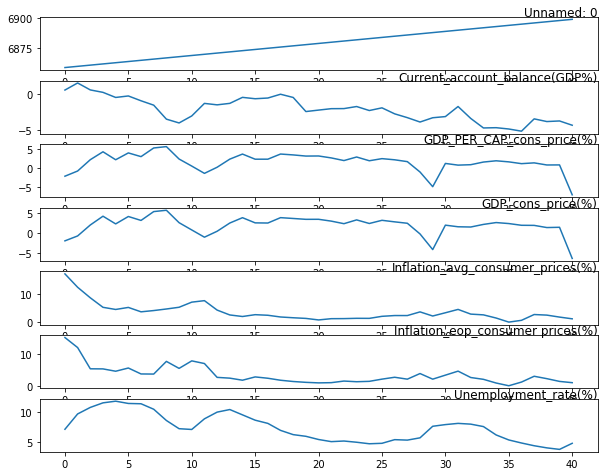

In [21]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
values = IMF_UK.values
plt.figure(figsize=(10,8))
for group in groups:
    
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(IMF_UK.columns[group], y=0.9, loc='right')
    i += 1
plt.show()

In [22]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
#X
imf_scaled = scaler.fit_transform(np.float32(IMF_UK))

In [23]:
imf_scaled

array([[0.        , 0.8530721 , 0.38623154, 0.36545694, 0.        ,
        1.0000001 , 1.        , 0.4174132 , 0.63293135],
       [0.0249939 , 0.99999994, 0.49375242, 0.46705905, 0.01621687,
        0.7227676 , 0.7920668 , 0.73501575, 0.55104005],
       [0.05000305, 0.8557435 , 0.7287703 , 0.69453984, 0.03321028,
        0.5039562 , 0.35149992, 0.87066245, 0.6823108 ],
       [0.07499695, 0.8052834 , 0.89271784, 0.87657356, 0.05162816,
        0.3068594 , 0.34944707, 0.9652997 , 0.62987244],
       [0.09999084, 0.6997625 , 0.7274969 , 0.71693647, 0.06594436,
        0.26224047, 0.30110592, 1.        , 0.6046146 ],
       [0.125     , 0.7306322 , 0.8691603 , 0.87044305, 0.08488579,
        0.30459872, 0.36785644, 0.9526813 , 0.66448176],
       [0.1499939 , 0.63060254, 0.7922801 , 0.7889489 , 0.09918056,
        0.21333809, 0.24461958, 0.94637215, 0.682136  ],
       [0.17500305, 0.539626  , 0.97182643, 0.9722904 , 0.12220149,
        0.23951456, 0.24230184, 0.83280754, 0.740867  ],


In [24]:
# define input sequence
# choose a number of time steps
n_steps = 4
# split into samples
x_data, y_data = prepare_data(imf_scaled, n_steps)

In [25]:
print(x_data)

[[[0.         0.8530721  0.38623154 ... 1.         0.4174132  0.63293135]
  [0.0249939  0.99999994 0.49375242 ... 0.7920668  0.73501575 0.55104005]
  [0.05000305 0.8557435  0.7287703  ... 0.35149992 0.87066245 0.6823108 ]
  [0.07499695 0.8052834  0.89271784 ... 0.34944707 0.9652997  0.62987244]]

 [[0.0249939  0.99999994 0.49375242 ... 0.7920668  0.73501575 0.55104005]
  [0.05000305 0.8557435  0.7287703  ... 0.35149992 0.87066245 0.6823108 ]
  [0.07499695 0.8052834  0.89271784 ... 0.34944707 0.9652997  0.62987244]
  [0.09999084 0.6997625  0.7274969  ... 0.30110592 1.         0.6046146 ]]

 [[0.05000305 0.8557435  0.7287703  ... 0.35149992 0.87066245 0.6823108 ]
  [0.07499695 0.8052834  0.89271784 ... 0.34944707 0.9652997  0.62987244]
  [0.09999084 0.6997625  0.7274969  ... 0.30110592 1.         0.6046146 ]
  [0.125      0.7306322  0.8691603  ... 0.36785644 0.9526813  0.66448176]]

 ...

 [[0.84999084 0.07257342 0.7058495  ... 0.05661877 0.2996845  0.3954728 ]
  [0.875      0.04526561 0

In [26]:
print(y_data)

[[0.09999084 0.6997625  0.7274969  0.71693647 0.06594436 0.26224047
  0.30110592 1.         0.6046146 ]
 [0.125      0.7306322  0.8691603  0.87044305 0.08488579 0.30459872
  0.36785644 0.9526813  0.66448176]
 [0.1499939  0.63060254 0.7922801  0.7889489  0.09918056 0.21333809
  0.24461958 0.94637215 0.682136  ]
 [0.17500305 0.539626   0.97182643 0.9722904  0.12220149 0.23951456
  0.24230184 0.83280754 0.740867  ]
 [0.19999695 0.24977732 0.99999994 1.         0.1516063  0.27199715
  0.505397   0.59936905 0.90971863]
 [0.22499084 0.17067379 0.7424592  0.74219394 0.17405818 0.3079303
  0.36024106 0.42902204 0.9326167 ]
 [0.25       0.31626594 0.5961798  0.5914664  0.19039233 0.41400442
  0.5159261  0.41324916 0.7594826 ]
 [0.2749939  0.5764321  0.4450457  0.44131112 0.19888656 0.4449402
  0.4607642  0.63406944 0.649362  ]
 [0.30000305 0.5463045  0.5720652  0.5642472  0.20930897 0.2493902
  0.17382956 0.77287066 0.40377557]
 [0.32499695 0.5770258  0.7403103  0.73500085 0.2288758  0.14831342

In [27]:
x_data.shape

(37, 4, 9)

In [28]:
y_data.shape

(37, 9)

In [29]:
print(x_data, y_data.shape)
# summarize the data
for i in range(len(x_data)):
    print(x_data[i], y_data[i])

[[[0.         0.8530721  0.38623154 ... 1.         0.4174132  0.63293135]
  [0.0249939  0.99999994 0.49375242 ... 0.7920668  0.73501575 0.55104005]
  [0.05000305 0.8557435  0.7287703  ... 0.35149992 0.87066245 0.6823108 ]
  [0.07499695 0.8052834  0.89271784 ... 0.34944707 0.9652997  0.62987244]]

 [[0.0249939  0.99999994 0.49375242 ... 0.7920668  0.73501575 0.55104005]
  [0.05000305 0.8557435  0.7287703  ... 0.35149992 0.87066245 0.6823108 ]
  [0.07499695 0.8052834  0.89271784 ... 0.34944707 0.9652997  0.62987244]
  [0.09999084 0.6997625  0.7274969  ... 0.30110592 1.         0.6046146 ]]

 [[0.05000305 0.8557435  0.7287703  ... 0.35149992 0.87066245 0.6823108 ]
  [0.07499695 0.8052834  0.89271784 ... 0.34944707 0.9652997  0.62987244]
  [0.09999084 0.6997625  0.7274969  ... 0.30110592 1.         0.6046146 ]
  [0.125      0.7306322  0.8691603  ... 0.36785644 0.9526813  0.66448176]]

 ...

 [[0.84999084 0.07257342 0.7058495  ... 0.05661877 0.2996845  0.3954728 ]
  [0.875      0.04526561 0

In [30]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(x_data, test_size=0.2)
train_y, test_y = train_test_split(y_data, test_size=0.2)

In [31]:
train_x.shape

(29, 4, 9)

In [32]:
train_y.shape

(29, 9)

In [33]:
test_x.shape

(8, 4, 9)

In [34]:
test_y.shape

(8, 9)

In [35]:
train_x

array([[[0.2749939 , 0.5764321 , 0.4450457 , ..., 0.4607642 ,
         0.63406944, 0.649362  ],
        [0.30000305, 0.5463045 , 0.5720652 , ..., 0.17382956,
         0.77287066, 0.40377557],
        [0.32499695, 0.5770258 , 0.7403103 , ..., 0.15753923,
         0.8264984 , 0.2976752 ],
        [0.34999084, 0.70154345, 0.84528446, ..., 0.11489306,
         0.7160883 , 0.37886733]],

       [[0.125     , 0.7306322 , 0.8691603 , ..., 0.36785644,
         0.9526813 , 0.66448176],
        [0.1499939 , 0.63060254, 0.7922801 , ..., 0.24461958,
         0.94637215, 0.682136  ],
        [0.17500305, 0.539626  , 0.97182643, ..., 0.24230184,
         0.83280754, 0.740867  ],
        [0.19999695, 0.24977732, 0.99999994, ..., 0.505397  ,
         0.59936905, 0.90971863]],

       [[0.80000305, 0.26417333, 0.62483084, ..., 0.17071718,
         0.5236592 , 0.2134242 ],
        [0.82499695, 0.06693375, 0.6798248 , ..., 0.13310377,
         0.47318605, 0.39818212],
        [0.84999084, 0.07257342, 0.7

In [36]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(LSTM(100, activation='relu'))
model.add(Dense(train_x.shape[2]))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(train_x, train_y, epochs=400, verbose=0)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [37]:
#preds = model.predict(test_x).squeeze()
preds = model.predict(test_x).squeeze()
mean_absolute_error(preds, test_y)

0.20043246

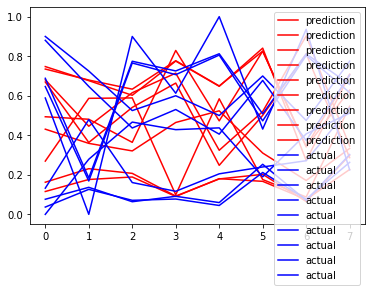

In [38]:
plt.plot(preds,color='red', label='prediction')
plt.plot(test_y,color='blue', label='actual')
plt.legend(loc='upper right')
plt.show()